# Prediction using Decision Tree Algorithm

# Task 6
Create the Decision Tree classifier and visualize it graphically.

# Problem
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Soumy Dubey

# Importing Libraries

In [264]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

# Load Dataset

In [265]:
data = pd.read_csv(r'E:\Internship SparkFoundation\iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [266]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [268]:
data.shape

(150, 6)

Null

In [269]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [270]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [271]:
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='Species', ylabel='count'>

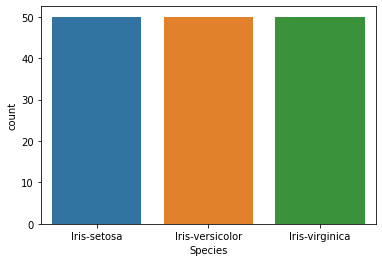

In [272]:
sns.countplot(x = 'Species', data = data)

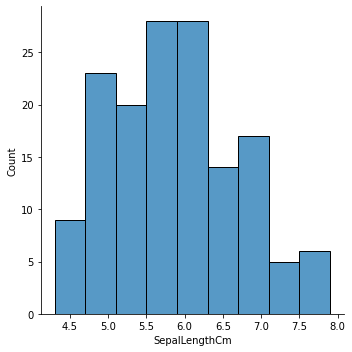

In [273]:
sns.displot(data['SepalLengthCm'])

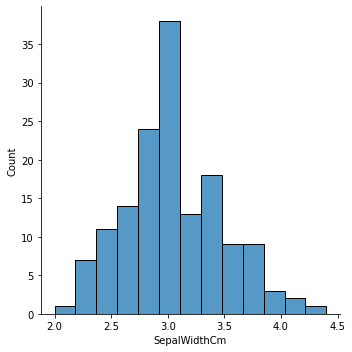

In [274]:
sns.displot(data['SepalWidthCm'])

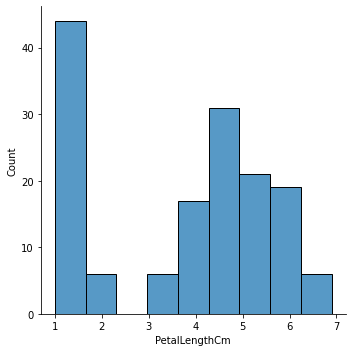

In [275]:
sns.displot(data['PetalLengthCm'])

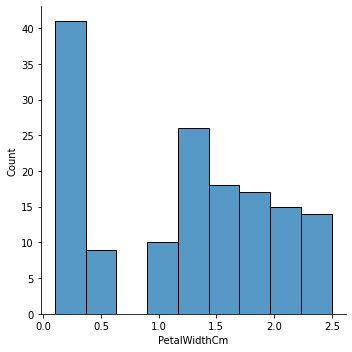

In [276]:
sns.displot(data['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

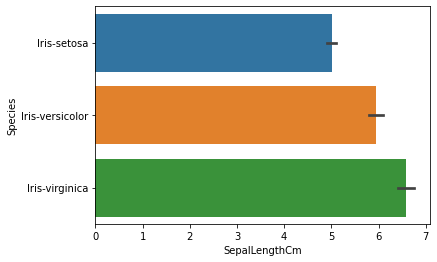

In [277]:
sns.barplot(x = data['SepalLengthCm'], y = data['Species'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

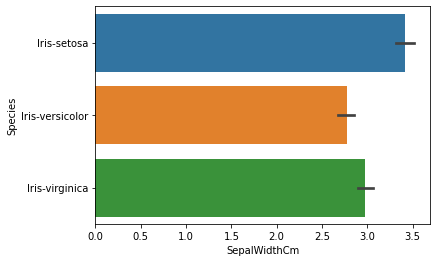

In [278]:
sns.barplot(x = data['SepalWidthCm'], y = data['Species'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

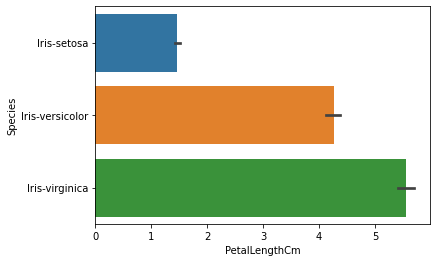

In [279]:
sns.barplot(x = data['PetalLengthCm'], y = data['Species'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

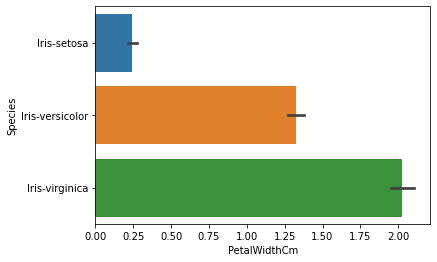

In [280]:
sns.barplot(x = data['PetalWidthCm'], y = data['Species'])

<AxesSubplot:xlabel='Species'>

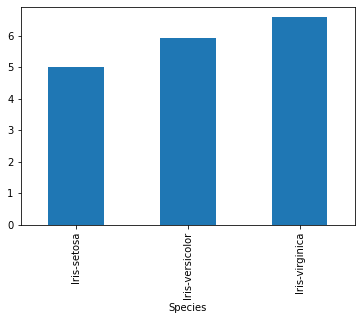

In [281]:
data.groupby('Species')['SepalLengthCm'].mean().plot.bar()

In [282]:
bins = [0,5,7,9]
group = ['Low', 'Average', 'High']
data['SepalLength_bin'] = pd.cut(data['SepalLengthCm'], bins, labels = group)
data['SepalLength_bin']

0      Average
1          Low
2          Low
3          Low
4          Low
        ...   
145    Average
146    Average
147    Average
148    Average
149    Average
Name: SepalLength_bin, Length: 150, dtype: category
Categories (3, object): ['Low' < 'Average' < 'High']

In [283]:
epalLength_bin = pd.crosstab(data['SepalLength_bin'], data['Species'])
SepalLength_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLength_bin,,,
Low,28,3,1
Average,22,47,37
High,0,0,12


<AxesSubplot:xlabel='SepalLength_bin'>

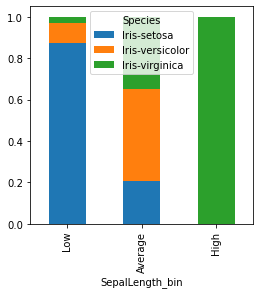

In [284]:
SepalLength_bin.div(SepalLength_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

<AxesSubplot:xlabel='Species'>

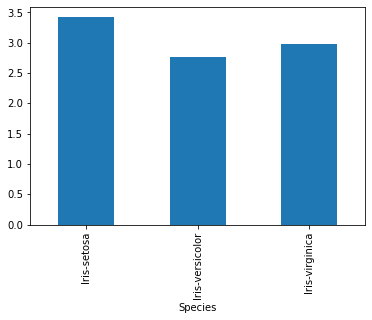

In [285]:
data.groupby('Species')['SepalWidthCm'].mean().plot.bar()

In [286]:
bins = [0,2.5,3.5,5]
group = ['Low', 'Average', 'High']
data['SepalWidth_bin'] = pd.cut(data['SepalWidthCm'], bins, labels = group)

SepalWidth_bin = pd.crosstab(data['SepalWidth_bin'], data['Species'])
SepalWidth_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
SepalWidth_bin,,,
Low,1,13,5
Average,34,37,42
High,15,0,3


<AxesSubplot:xlabel='SepalWidth_bin'>

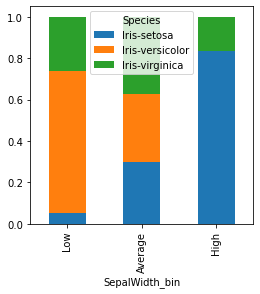

In [287]:
SepalWidth_bin.div(SepalWidth_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

<AxesSubplot:xlabel='Species'>

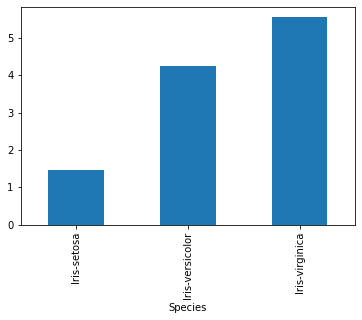

In [288]:
data.groupby('Species')['PetalLengthCm'].mean().plot.bar()

In [289]:
bins = [0,2,6,9]
group = ['Low', 'Average', 'High']
data['PetalLength_bin'] = pd.cut(data['PetalLengthCm'], bins, labels = group)

PetalLength_bin = pd.crosstab(data['PetalLength_bin'], data['Species'])
PetalLength_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
PetalLength_bin,,,
Low,50,0,0
Average,0,50,41
High,0,0,9


<AxesSubplot:xlabel='PetalLength_bin'>

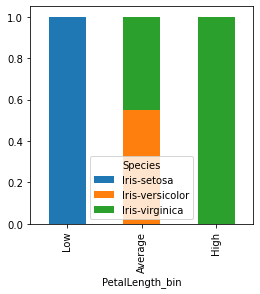

In [290]:
PetalLength_bin.div(PetalLength_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

<AxesSubplot:xlabel='Species'>

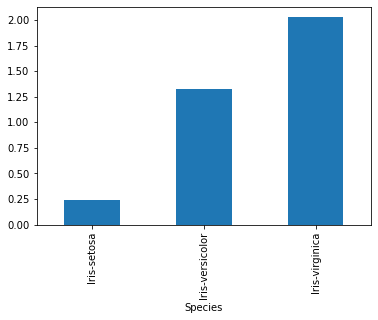

In [291]:
data.groupby('Species')['PetalWidthCm'].mean().plot.bar()

In [292]:
bins = [0,1,2,3]
group = ['Low', 'Average', 'High']
data['PetalWidth_bin'] = pd.cut(data['PetalWidthCm'], bins, labels = group)


PetalWidth_bin = pd.crosstab(data['PetalWidth_bin'], data['Species'])
PetalWidth_bin

Species,Iris-setosa,Iris-versicolor,Iris-virginica
PetalWidth_bin,,,
Low,50,7,0
Average,0,43,27
High,0,0,23


<AxesSubplot:xlabel='PetalWidth_bin'>

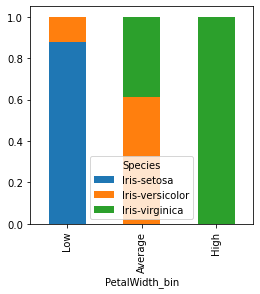

In [293]:
PetalWidth_bin.div(PetalWidth_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

In [294]:
data= data.drop(['SepalLength_bin', 'SepalWidth_bin', 'PetalLength_bin', 'PetalWidth_bin'], axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

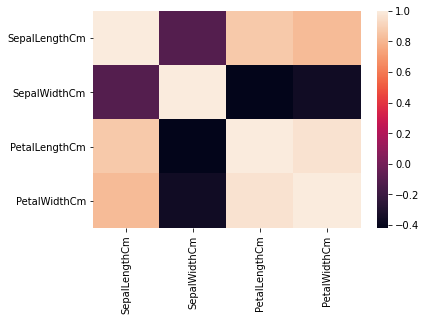

In [295]:
sns.heatmap(data.corr())

# Model Building

In [296]:
# Transform Model

data['Species'] = LabelEncoder().fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [297]:
# Fit model

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [298]:
dtree = DecisionTreeClassifier()
train = dtree.fit(X_train, y_train)
train

DecisionTreeClassifier()

In [299]:
# Predict model

y_pred = dtree.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [300]:
# Accuracy of the model

accuracy_score(y_pred, y_test)

1.0

In [301]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

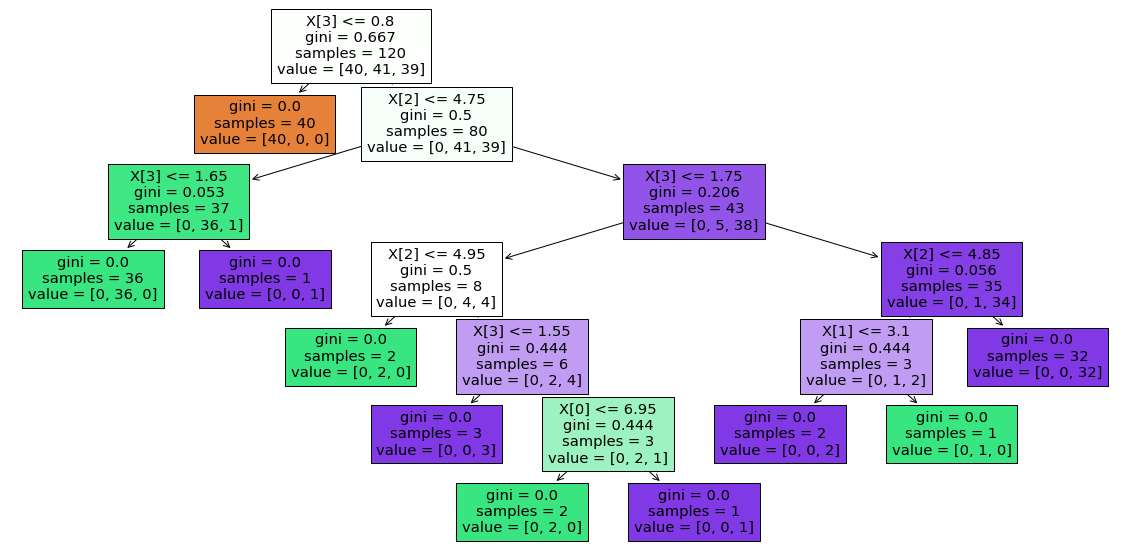

In [302]:
# Plotting Decision Tree

plt.figure(figsize = (20, 10))
plot_tree(train, filled = True)
plt.show()